[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mnl8lcr/GST_Work/blob/master/New_&_Inspired_MLE_for_Oscillating_Probability.ipynb)

# Fresh & Inspired MLE

## 1. Physical model for observed drift signal

## 2. Mathematical framework for likelihood function

### Likelihood function for a generic set of observations

The likelihood of a set of parameter values, for a set of observations ${\cal L}({\rm parameters} | {\rm observations})$  is given by the probability of the observations, given the parameters, $p({\rm observations}| {\rm parameters})$.

Suppose observation $k$ occurs with probability $p_k(\theta)$, where $\theta$ represents the parameters.

### Likelihood function for drift model

This notebook will attempt to further and implement the log-likelihood MLE introduced in section 4.1.4 of Prof. Chuang's Quantum Drum paper, but for my drift model.

Starting with
    
$$p_{1} (t) = 0.5 + a \sin(2\pi f t + \phi )$$
$$p_{0} (t) = 1 - p_{1} (t) = 0.5 - a \sin(2\pi f t + \phi )$$

These give us the following log-likelihood ($\cal L$) function for N-data points $(t_{i}, y_{i})$, each with probability $p_{i}$:
$$\cal L = -\Sigma_{i}^{N} \log(p_{i})$$
$$ = -\Sigma_{i}^{N} \log[(1-y_{i})p_{0}(t_{i}) + y_{i} p_{1}(t_{i})]$$
$$ = -\Sigma_{i}^{N} \log[(1-y_{i})(0.5 - a \sin(2\pi f t_{i} + \phi )) + y_{i} p_{1}(0.5 + \sin(2\pi f t_{i} + \phi ))]$$

NEW LOSS FUNCTION METHOD:

Alternatively, the new loss function defined today was:
$${\rm loss} = -log\Sigma_{k}p_{k} = \left(\frac{N_{0}}{N}p_{0} + \frac{N_{1}}{N}p_{1} \right)N$$
for possible outcomes k, which are 0 or 1. This can be written as the following integral for large N:

$$ {\rm loss} = -log\int_{t=0}^{T} \left [ p_{0}^X(t)p_{0}(t) - p_{1}^X(t)p_{1}(t)  \right] \mathrm{d}t$$
$$ = -log\int_{0}^{T} (0.5 - X \sin{2\pi Z t + W})(0.5 - a \sin{2\pi f t + \phi }) + (0.5 + X \sin{2\pi Z t + W})(0.5 + a \sin{2\pi f t + \phi })] \mathrm{d}t$$

where {$X$, $Z$, $W$} are the pseudo-parameters from the data that must be fit to the actual parameters of the model, {$a$, $f$, $\phi$}.

## Solving the Integral and Plotting

The solved form of the integral labeled $\mathrm{loss}(X, Z, W, a, f, \phi)$ will be covered here. Hopefully, we can plot the loss function for various pseudo-parameters to learn about the shape of the function and how we can find the actual data parameters.

We have:

$$\mathrm{loss} = -\ln{\int_{0}^T [\frac{1}{2} + 2Xa \sin{(2\pi Zt + W)\sin{(2\pi ft + \phi)}]}  dt}$$

which, using the trig identity $sinAsinB = \frac{1}{2}[cos(A-B) - cos(A+B)]$, for $A = 2\pi Zt + W$ and $B = 2\pi ft + \phi$, we can rewrite as:

$$\mathrm{loss} = -\ln{\int_{0}^T {\frac{1}{2} + Xa\cos{[2\pi (Z - f)t + (W-\phi)}] - Xa\cos{[2\pi (Z+f)t + (W + \phi)}]} dt}$$

Hopefully without any math errors, this should give:
$$\mathrm{loss} = -\ln{(\frac{T}{2} + \frac{Xa}{2\pi (Z - f)}{(\sin{[2\pi(Z - f)T + (W - \phi)]} - \sin{[W - \phi]})} - \frac{Xa}{2\pi (Z + f)}(\sin{[2\pi(Z + f)T + (W + \phi)]} - \sin{[W + \phi]}))}$$

The ideal case is when $Z = f$, $X = a$, and $W = \phi$, which leaves a zero in the denominator for the second term. This will require some L'Hopital's rule stuff.


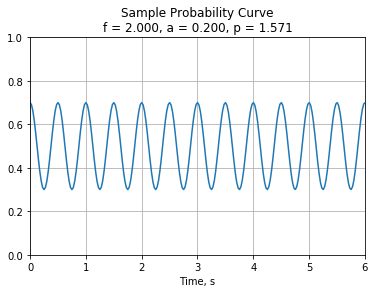

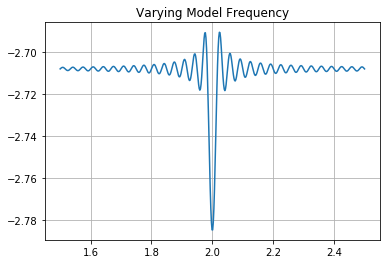

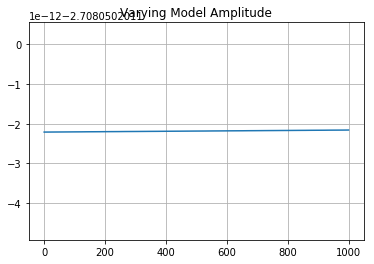

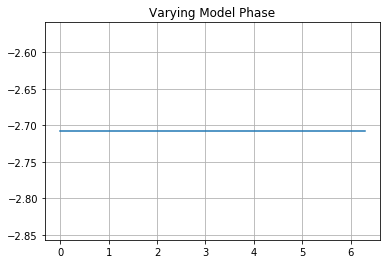

In [40]:
import numpy as np
import pylab as plt
from numpy import pi, sin, cos

def p1(t, a, f, p):
    'probability of being in the 1-state as a function of time'
    return 0.5 + a*sin(2*pi*f*t + p)
 
#create an oscillating probability here and plot it.
T = 30
a = 0.2
f = 2.0
p = 0.5*pi
times = np.linspace(0, T, 1200)
probs = p1(times, a, f, p)
plt.plot(times, probs)
plt.xlim(0, 6)
plt.xlabel("Time, s")
plt.title("Sample Probability Curve\nf = {:.3f}, a = {:.3f}, p = {:.3f}".format(f, a, p))
plt.grid()
plt.ylim(0,1)
plt.show()

def loss(X, Z, W, a, f, p):
    #the solved integral form of the loss function above
    term1 = T/2
    term2 = X*a/(2*pi*(Z-f + 1e-8))*( sin(2*pi*(Z-f)*T +(W-p)) - sin(W-p) )
    term3 = -X*a/(2*pi*(Z+f + 1e-8))*( sin(2*pi*(Z+f)*T +(W+p)) - sin(W+p) )
    #print(term2 + term3)
    return -np.log(term1 + term2 + term3)
    #return -term1 - term2 + term3

#attempt to plot the loss function; it doesn't look too good...
X = a
Z = np.linspace(1.5, 2.5, 500)
W = p
losses = loss(X, Z, W, a, f, p)
plt.plot(Z, losses)
plt.grid()
plt.title("Varying Model Frequency")
plt.show()

X = np.linspace(0,1e3, 50)
Z = f
W = p
losses = loss(X, Z, W, a, f, p)
plt.plot(X, losses)
plt.title("Varying Model Amplitude")
plt.grid()
plt.show()

X = a
Z = f
W = np.linspace(0, 2*pi, 500)
losses = loss(X, Z, W, a, f, p)
plt.plot(W, losses)
plt.title("Varying Model Phase")
plt.grid()
plt.show()


I'm finding that the frequency difference seems to dominate over everything else, while the phase or amplitude differences create a negligible change in the loss function value.

But, if I keep working with frequency, I'd like to see if I can find an analytical plot of estimated frequency versus loss function for the simulated {0,1} data.

$$\cal L = -\ln{\Sigma_{i}^{N}p_{i}}$$
$$ = -\ln{\Sigma_{i}^{N} [(1-y_{i})p_{0}(t_{i}) + y_{i} p_{1}(t_{i})]}$$
$$ = -\ln{\Sigma_{i}^{N} [(1-y_{i})(0.5 - a \sin(2\pi f t_{i} + \phi )) + y_{i} p_{1}(0.5 + \sin(2\pi f t_{i} + \phi ))]}$$

In the case that I know $a$ and $\phi$, I'll just scan across f with the experimental data and see what I get.

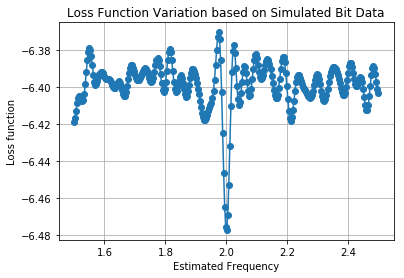

In [38]:
def analytical_loss(t_data, y_data, f_range, a, p):
    loss_list = []
    for f in f_range:
        sum_term = 0
        for i in range(len(t_data)):
            t = t_data[i]
            y = y_data[i]
            sum_term += (1-y)*(1-p1(t, a, f, p)) + y*p1(t, a, f, p)
        loss = -np.log(sum_term)
        loss_list.append(loss)
    optimal_f_index = loss_list.index(min(loss_list))
    optimal_f = f_range[optimal_f_index]
    return loss_list, optimal_f

#generate 0,1 values based on the probability curve created above
vals = np.random.binomial(1, probs)
#compute loss list for a range of frequencies
f_range = np.linspace(1.5, 2.5, 300)
loss_list, optimal_f = analytical_loss(times, vals, f_range, a, p)
#plot the loss versus frequency guess
plt.plot(f_range, loss_list, marker='o')
plt.xlabel("Estimated Frequency")
plt.ylabel("Loss function")
plt.grid()
plt.title("Loss Function Variation based on Simulated Bit Data")
plt.show()

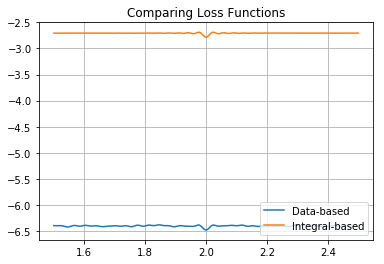

In [37]:
plt.plot(f_range, loss_list, label='Data-based')
X = a
Z = f_range
W = p
losses = loss(X, Z, W, a, f, p)
plt.plot(Z, losses, label='Integral-based')
plt.grid()
plt.title("Comparing Loss Functions")
plt.legend(loc='lower right')
plt.show()

Something is wrong in my math somewhere, there shouldn't be this offset. I think I know where it may come from though:

If we derived the integral-form loss function from the basic function:

$${\rm loss} = -log\Sigma_{k}p_{k} = -\log\left(\frac{N_{0}}{N}p_{0} + \frac{N_{1}}{N}p_{1} \right)N$$

then this should leave us with a constant $log(N)$ term at the end
$$-\log\left(\frac{N_{0}}{N}p_{0} + \frac{N_{1}}{N}p_{1} \right)N = -\log\left(\frac{N_{0}}{N}p_{0} + \frac{N_{1}}{N}p_{1} \right) - \log{N}$$

Have we accounted for this $\log{N}$ anywhere?
